In [4]:
import os
import sys
import lightning as L
import torch
from lightning import LightningModule
import matplotlib.pyplot as plt
import numpy as np

In [9]:
sys.path.append(os.path.abspath(os.path.join('..')))
from src.models.components.basic import Basic

data_loc = "../data/VAE000/cleaned_data/"

In [6]:
model = Basic()
model.load_state_dict(torch.load("model_structure_factors.pt"))
model.eval()

Basic(
  (fc1): Linear(in_features=22271, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (fc21): Linear(in_features=400, out_features=20, bias=True)
  (fc22): Linear(in_features=400, out_features=20, bias=True)
  (fc3): Linear(in_features=5907, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=400, bias=True)
  (fc5): Linear(in_features=400, out_features=16384, bias=True)
  (elu): ELU(alpha=1.0)
  (sigmoid): Sigmoid()
)

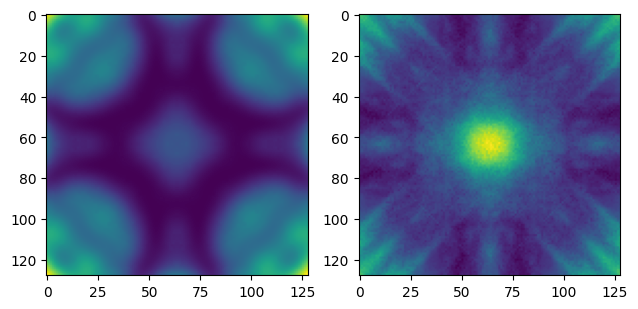

In [147]:
CISDs = os.listdir(data_loc)
CISD = np.random.choice(CISDs)

pattern = np.clip(np.fromfile(
    os.path.join(data_loc, CISD, f"{CISD}_+0+0+0.bin"),
    dtype=np.float64), 0.0, 1.0)
structure_factors = np.loadtxt(
    os.path.join(data_loc, CISD, f"{CISD}_structure_factors.txt"))

structure_factors = torch.from_numpy(structure_factors).float().clone().detach().view(1, -1)

prediction = model.decode(torch.rand(1, model.latent_dims), structure_factors)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(pattern.reshape((128, 128)))
axs[1].imshow(prediction.detach().numpy().reshape((128, 128)))

plt.tight_layout()
plt.show()